# European Football Historical Analysis

## Overview

This notebook demonstrates scraping European football match results, then analyzing them to see how the sport has changed.

## Part 1 - Code

The following code explains how to scrape match data from [https://football-data.co.uk/](https://football-data.co.uk/) for various countries and divisions. I have made this dataset available on [Kaggle](https://www.kaggle.com/datasets/flynn28/european-football-matches). The scraper take about 7.5 minutes to run

**Step 1 - Import Modules**

This scraper uses the following modules:
1. `Requests`: to fetch the data
2. `Pandas`: for interacting with dataframes and csv
3. `IO`: for interacting with strings

In [1]:
import requests
import pandas as pd
import io

**Step 2 - Create Scraping Function**

The following snippet does the following:
1. define a function with input code- for the leagues id, name- for the leagues name, and season- for the season to scrape
2. define and fill inthe url to scrape from
3. call the url and store the response
4. define columns to keep so we can remove unnecessary data
5. read the response as a csv, skipping unwanted columns, and bad lines
6. add a column for the league
7. returns the dataframe

In [2]:
def scrape(code, name, season): # 1. defines the function and it's input
    url = f"https://www.football-data.co.uk/mmz4281/{season[:2]}{season[3:]}/{code}.csv" # 2. defines the url and fills it in
    response = requests.get(url) # 3. store the response
    keep = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'] # 4. define columns to keep
    df = pd.read_csv(io.StringIO(response.text), usecols=lambda column: column in keep, on_bad_lines='skip', encoding="ISO-8859-1") # 5. read response skipping unwanted rows and columns 
    df["League"] = name # add column with league name
    return df # return dataframe

**Step 3 - Define Cleaning Function**

The following snippet defines a function to clean the data:

1. define the function and its input
2. combine all the dataframes into one
3. rename the columns into something meaningful
4. remove rows with missing data
5. reorder columns
6. set index
7. return dataframe

In [3]:
def clean(df_list): # 1. define the function, take input for a list of dataframes
    df = pd.concat(df_list, ignore_index=True) # 2. create a large dataframe using the list
    df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result'}, inplace=True) # 3. rename the columns
    df.dropna(inplace=True) # 4. drop rows that are missing data
    df = df[['League', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'Result']] # 5. reorder the columns
    df.set_index('League', inplace=True) # 6. set the dataframes index to the League column
    return df # return the dataframe

**Step 4 - Define Save Function**

The following snipped does the following:
1. defines the saving function and its input
2. saves the large dataframe
3. splits the dataframe based on league
4. saves seperated dataframes for each league

In [4]:
def save(df): # 1. defines save function with 
    df.to_csv("data/combined_matches.csv") # 2. save the combined dataframe
    for league, matches in df.groupby("League"): # 3. iterate through columns in df grouped by league
        matches.to_csv(f"data/{league}.csv") # 4. save league dataframe

**Step 5 - Define leagues and seasons**

This snippet does the following:
1. stores league ids and names in a dictionary
2. stores seasons in a list

In [5]:
leagues = { # 1. store league id and names into dictionary
    "E0": "English Premier League",
    "E1": "English Championship",
    "E2": "English League 1",
    "E3": "English League 2",
    "EC": "English Conference",
    "SC0": "Scottish Premier League",
    "SC1": "Scottish Division 1",
    "SC2": "Scottish Division 2",
    "SC3": "Scottish Division 3",
    "D1": "Bundesliga",
    "D2": "Bundesliga 2",
    "I1": "Serie A",
    "I2": "Serie B",
    "SP1": "La Liga",
    "SP2": "La Liga 2",
    "F1": "Ligue 1",
    "F2": "Ligue 2",
    "N1": "Eredivisie",
    "B1": "Jupiler League",
    "P1": "Liga Portugal",
    "T1": "Super Lig",
    "G1": "Greek Super League"
}

years = [ # 2. store seasons in list
    '93-94', '94-95', '95-96', '96-97', '97-98', '98-99', '99-00',
    '00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
    '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14',
    '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', 
    '21-22', '22-23'
]

**Step 6 - Run Web Scraper**

This snippet does the following:
1. creates a list to store returned dataframes
2. iterates through league dictionary and year
3. call scrape function and append to list of dataframes
4. clean and save data

In [6]:
df_list = [] # 1. create list to store dataframes
for k, v in leagues.items(): # 2. iterate through dictionary of leagues
    for i in years: # 3. iterate through seasons
        df_list.append(scrape(k, v, i)) # 4. scrape data and append to list
 
save(clean(df_list)) # 5. clean list and save

## Part 2 - Analyze

This notebook analyzes the data by plotting various data points within the data, including:
1. Home Wins vs. Away Wins vs. Draws
2. Average Home Score vs Average Away Score by League
3. Teams with most wins
4. Teams with most losses
5. Teams with most drawls

**Import Modules and Read Data**

this snipped does the following:
1. imports Pandas to read data
2. imports Matplotlib to plot data
3. load data

In [7]:
import pandas as pd # 1. import pandas library to read data
import matplotlib.pyplot as plt # 2. import matplotlib library to plot data

df = pd.read_csv("data/combined_matches.csv") # 3. read data and store in a dataframe

**Home vs Away vs Draw**

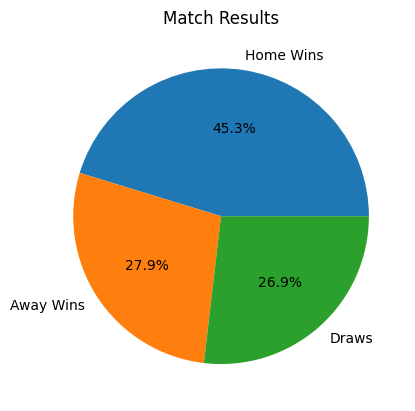

In [8]:
home_wins = (df["Result"] == "H").sum() # calculate home wins
away_wins = (df["Result"] == "A").sum() # calculate away wins
draws = (df["Result"] == "D").sum() # calculate draws
labels = ['Home Wins', 'Away Wins', 'Draws'] # define labels
results = [home_wins, away_wins, draws] # define data points

plt.pie(results, labels=labels, autopct='%1.1f%%') # plot data in pie chart
plt.title('Match Results') # set chart title
plt.show() # display chart

**Average Home Score vs Away Score by League**

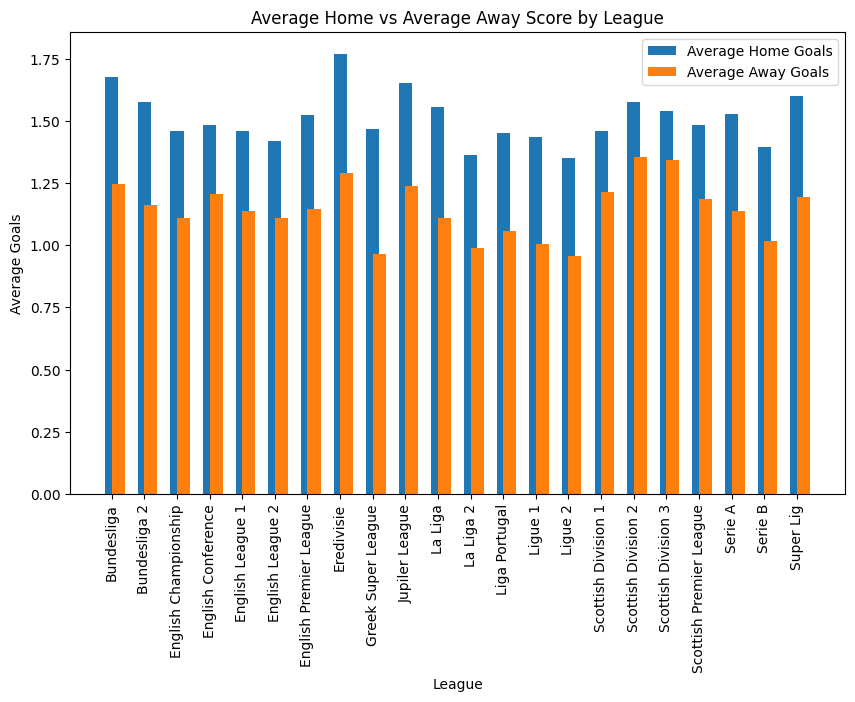

In [9]:
avg_home_score = df.groupby("League")["HomeGoals"].mean() # calculate average home goals by league
avg_away_score = df.groupby("League")["AwayGoals"].mean() # calculate average away goals by league

plt.figure(figsize=(10,6)) # set chart size
plt.bar(avg_home_score.index, avg_home_score, width=0.4, label='Average Home Goals', align='center') # plot home goals
plt.bar(avg_away_score.index, avg_away_score, width=0.4, label='Average Away Goals', align='edge') # plot away goals
plt.xlabel('League') # set X axis title
plt.ylabel('Average Goals') # set Y axis title
plt.title('Average Home vs Average Away Score by League') # Set graph title
plt.xticks(rotation=90) # set rotation of league names
plt.legend() # create graph key
plt.show() # display graph

**Top 10 Teams with the Most Wins**

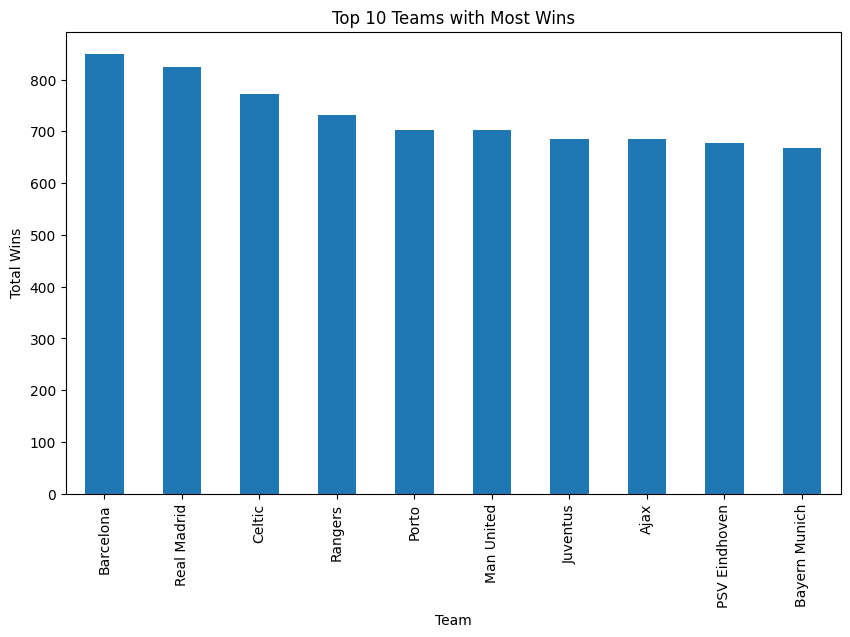

In [10]:
home_wins = df[df["Result"] == "H"]["HomeTeam"].value_counts() # count home wins by team
away_wins = df[df["Result"] == "A"]["AwayTeam"].value_counts() # count away wins by team
total_wins = home_wins.add(away_wins, fill_value=0) # add home and away counts
total_wins_sorted = total_wins.sort_values(ascending=False) # sort list

plt.figure(figsize=(10, 6)) # set graph size
total_wins_sorted.head(10).plot(kind="bar") # plot data and set type
plt.xlabel('Team') # label X axis
plt.ylabel('Total Wins') # label Y axis
plt.title('Top 10 Teams with Most Wins') # title graph
plt.show() # print graph

**Top 10 Teams with the Most Ties**

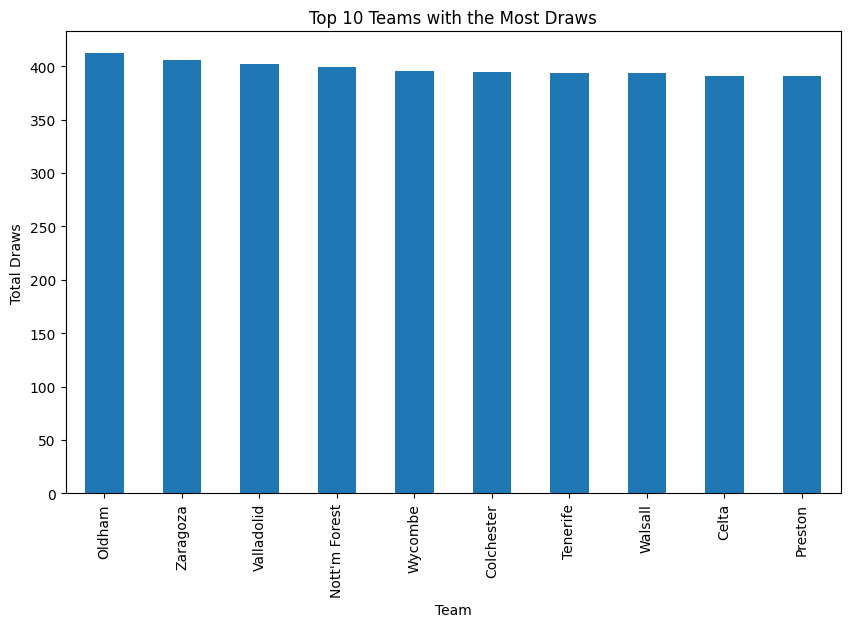

In [11]:
draws = df[df["Result"] == "D"] # seperate draws
home_draws = draws["HomeTeam"].value_counts() # count home draws
away_draws = draws["AwayTeam"].value_counts() # count away draws
total_draws = home_draws.add(away_draws, fill_value=0) # combine home and away
total_draws_sorted = total_draws.sort_values(ascending=False) # sort list

plt.figure(figsize=(10, 6)) # set graph size
total_draws_sorted.head(10).plot(kind="bar") # plot data and set graph tyype
plt.xlabel('Team') # Label X axis
plt.ylabel('Total Draws') # label Y axis
plt.title('Top 10 Teams with the Most Draws') # Set graph title
plt.show() # display graph

**Top 10 Teams with the Most Games Lost**

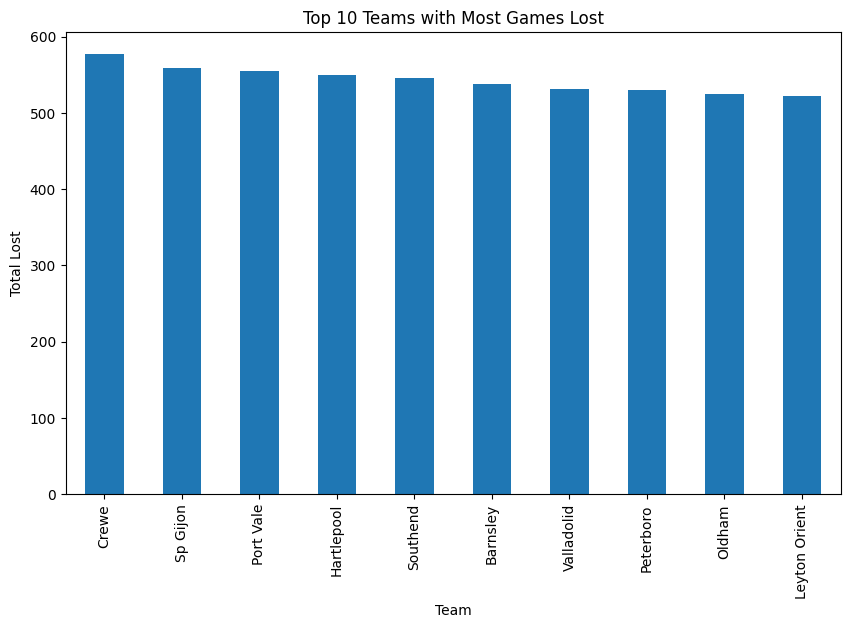

In [12]:
home_loss = df[df["Result"] == "A"]["HomeTeam"].value_counts() # count home losses by team
away_loss = df[df["Result"] == "H"]["AwayTeam"].value_counts() # count away losses by team
total_loss = home_loss.add(away_loss, fill_value=0) # add home and away counts
total_loss_sorted = total_loss.sort_values(ascending=False) # sort list

plt.figure(figsize=(10, 6)) # set graph size
total_loss_sorted.head(10).plot(kind="bar") # plot data and set type
plt.xlabel('Team') # label X axis
plt.ylabel('Total Lost') # label Y axis
plt.title('Top 10 Teams with Most Games Lost') # title graph
plt.show() # print graph

## License

This notebook is licensed under the MIT open source liscense.